## Stat 159 Final Project

## Introduction

Cancer is a leading cause of mortality in the United States, and understanding the factors that affect cancer mortality can help the federal government as well as state governments effectively allocate capital and resources in the correct areas. Using data on Cancer mortality and its factors, we hope to answer the research question: what socioeconomic and/or geographic factors most affect cancer mortality rates, and to what extent? Using our dataset, consisting of both yearly values and multi-year averages from cancer.gov, the American Community Survey, and clinicaltrials.gov, the focus of our project is causal inference on variables such as age, gender, race/ethnicity, socioeconomic status, geographic location, and more. Due to the issues of non-normality and linearity found in data exploration, we decided to use modeling tools that did not rely on these assumptions. Additionally, we focused on modeling tools that created a more parsimonious model, focusing on picking out the most impactful variables in exchange for less prediction accuracy. 


## Modeling Tool Motivations

Modeling was largely divided into two parts: feature selection and coefficient inference, and the modeling techniques used for each section were Lasso regression and Bootstrap confidence intervals, respectively. For feature selection, initial variables were chosen on the basis of domain knowledge and exploratory data analysis, constituting an initial model. Domain knowledge was also used to pick out a list of possibly important features, and then Lasso regression was used to create a final model. By using Lasso, we were able to effectively choose between a great deal of additional features, as well as eliminate any initial variables that were found to be unimportant. Additionally, by using the lambda value one standard error away from the minimum lambda value, we were able to obtain a far more sparse model than other methods. Finally, by using Bootstrap inference, we were able to not only obtain parameter inference without a normality assumption, but also help justify the use of imputation on missing values. By using these modeling techniques, we were able to create an answer to our research question that was focused on the most important features impacting cancer mortality, as well as without using improbable assumptions.


## Modeling Tool Assumptions

As mentioned prior, by using Lasso regression and Bootstrap inference, the assumptions I assumed about my model were homoskedasticity, linearity, and no excessive multicollinearity. I also am assuming that my sample is representative of the population.


## Feature Selection Using LASSO

Initial variable selection for our model will be informed by domain knowledge and insight gained from prior visualization of the data.

Literature on socioeconomic factors affecting cancer mortality point to poverty, education, and race as some of the most important factors. In the 2017 paper "Socioeconomic and Racial/Ethnic Disparities in Cancer Mortality, Incidence, and Survival in the United States, 1950–2014: Over Six Decades of Changing Patterns and Widening Inequalities," the authors concluded that individuals in lower income and education groups had significantly higher mortality and incidence rates (Singh and Jemal). The authors also noted that Blacks had higher mortality and incidence rates than other races, likely due to the interconnection of race and income. In the 2021 paper "Leading cancers contributing to educational disparities in cancer mortality in the US, 2017," the authors concluded that there was a significant difference between the mortality rate between individuals with a bachelors degree and higher, and all education levels below that (Withrow, D. R Et al.). Since both these studies use data exclusively from the U.S., and are within the time frame of interest to us, we decided to use these conclusions to guide our variable selection. Prior visualization of the data set supports these conclusions as well as suggest a categorical variable indicating whether a given county is in the Southwest region. To define which states belong to the Southeast, we used the regions specified by the Bureau of Economic Analysis, who divide the United States into 8 regions.

Additionally, the conclusions from the second paper suggest a new variable related to education, **PctHS18_24** (Percent of county residents ages 18-24 highest education attained: high school diploma). While there are several other variables related to educational goals, such as percentage of county residents ages 18-24 who have attained a bachelors, the literature above suggests that residents with lower educational achievements tend to have a higher cancer mortality, while the opposite is not necessarily true. The variables for the initial model were thus **povertyPercent** (Percent of populace in poverty), **PctBlack** (Percent of county residents who identify as Black), and **PctHS18_24**. 

For future investigation we decided to consider **isSouthEast** (Categorical variable indicating whether the county is in the South East), as well as the variables related to healthcare coverage, **PctPublicCoverage** (Percent of county residents with government-provided health coverage) and **PctPublicCoverageAlone** (Percent of county residents with government-provided health coverage alone), and a more nuanced poverty variable **PctUnemployed16_Over** (Percent of county residents ages 16 and over unemployed).


According to the Lasso results, **PctBlack** was eliminated, while **povertyPercent**,**PctPublicCoverage**,**isSoutheast**, **PctHS18_24**, **PctPublicCoverageAlone**, **PctUnemployed16_Over** were selected as our final variables. Interpreting these results, it appears that for this data set, variables related to healthcare coverage and unemployment are better predictors of cancer mortality than the percentage of black residents. We don’t find this contradictory to prior literature cited that concludes a racial divide in cancer mortality, as not only does Lasso judge on prediction accuracy, but it’s more likely that these variables are correlated in some way, and the variables related to healthcare coverage and poverty are more comprehensive due to not segregating by race.

## Coefficient Inference using the Bootstrap

We applied a nonparametric bootstrap approach to determine the statistical significance of the various parameters involved in the imputed dataset. This will relax the assumptions of the linear modeling, specifically the assumption of normally distributed errors, and allow us to visualize the distributions of these coefficients.

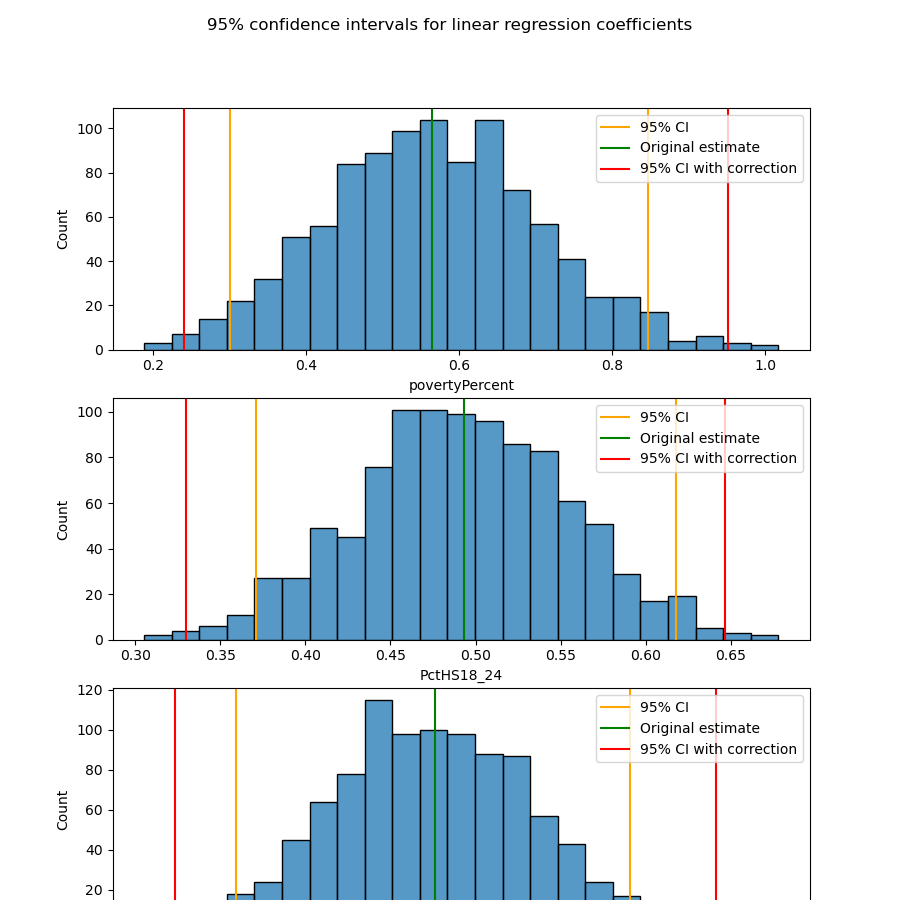

In [2]:
from IPython.display import Image
Image(filename='figures/Confidence_Interval_Hist.png')

We employ a Bonferroni correction (in red) to account for the simultaneous construction of 6 confidence intervals and 6 hypothesis tests.

From initial inspection, it’s clear that povertyPercent, PctHS18_24, and isSoutheastYes
all reject the null hypothesis that the respective coefficient effect is actually 0. Upon inspecting
PctUnemployed16_Over’s bottom quantile, it appears this variable rejects
the null hypothesis that the respective coefficient effect is actually 0. PctPublicCoverage and
PctPublicCoverageAlone both fail to reject the hypothesis that the coefficient effect is actually 0 if a Bonferroni correction is applied.

Based on these inference results, each of the variables with a confidence interval that doesn’t
include 0 does have some effect on cancer mortality, while we cannot for certain say the same for
PctPublicCoverage and PctPublicCoverageAlone, whose confidence interval does contain 0.
These conclusions of course are contingent on confidence level selected (0.05 with a Bonferroni
Correction), the randomness of the Bootstrap (1000 replications), as well as the randomness of
the imputation process. Using a random seed, we provide just 1 realization of the results.

## Variable Interpretation/Conclusion

Based on the results of my modeling using Lasso regression and Bootstrap inference, we
came to the following conclusions to the research question. 

For every percent increase of a county's population in poverty, on average the cancer mortality per 100,000 residents in a county increases by approximately 0.563 individuals (CI: 0.2000-0.9467). For every percent increase of county residents ages 18-24 who’s highest education attained is a high school diploma, on average the cancer mortality per 100,000 residents increases by 0.4931 (CI: 0.3419-0.6497).

Compared to other regions of the United States, Southeast counties have on average 11.66 (CI:
8.642-14.6664) more cancer deaths per 100,000 residents. For every percent increase of county
residents with government-provided health coverage, on average the cancer mortality per 100,000 residents in a county increases by approximately 0.2811 individuals (CI: -0.06139 -0.6253). 

For every percent increase of county residents with government-provided health coverage alone, on average the cancer mortality per 100,000 residents in a county increases by approximately 0.5704 individuals (CI: -0.00614-1.1627). Finally, for every percent increase of county residents ages 16 and over unemployed, on average the cancer mortality per 100,000 residents in a county increases by approximately 0.563 individuals (CI: 0.0119-1.1144).


From these conclusions, the most important finding is that counties in the Southeast
region of the United States have significantly higher cancer mortality than other regions of the
United States. It is important to note that these conclusions have some limitations, including the
fact that the data ends at 2016 and only includes deaths from lung cancer, and that the modeling
assumes no excessive collinearity and utilizes techniques such as Lasso or Bootstrapping, which
have an aspect of randomness. Regardless, from these conclusions we would suggest further
research on specifically the Southeast region of the United States, to better understand the
specific causes of such higher mortality rates. Additionally, based on the results, education and
poverty were identified as significant predictors of cancer mortality, suggesting a few areas of
focus to start research on. Overall, the results highlight the need for federal action to aid these
Southeast communities, which in turn will reduce cancer mortality overall in the United States.

## Author Credits

__Brandon Rodriguez__: Provided written material and figure ideas for Data Exploration, Data Visualization, and the Regression Analysis. Wrote the Introduction and Purpose of Analysis in the `Main.ipynb`. Decided which regression models to use and analyzed each model. 

__Noah Tran__: Created `Regression-Analysis.ipynb` and the canceroltools utility functions and test suite (`ols.py`, `preprocess.py`, and `visuals.py`). Helped chose regression models and convert code for all regressions to be compatible in the notebooks.

__Danielle Killeen__: Created `Data-Visualization.ipynb` and converted code for all visualizations to be compatible in notebooks, created and the `_toc.yml`, `_config.yml`, and `book.yml` to build and continuously integrate the jupyter book. Also helped to summarize all of the information of the analyis notebooks into `Main.ipynb`. 

__Didi Duan__: Created and finished `Data-Preparation.ipynb`, provided written material and code for the data preparation; Wrote the `environemnt.yml` and created the binder link, `README.md` and `LICENSE` for the repo. 

__Jiayi Qiu__: Created the `Makefile` and helped move text to make sense in `Main.ipynb`.

## Sources Cited

Singh, G. K., & Jemal, A. (2017). Socioeconomic and Racial/Ethnic Disparities in Cancer Mortality, Incidence, and    Survival in the United States, 1950-2014: Over Six Decades of Changing Patterns and Widening Inequalities. Journal of environmental and public health, 2017, 2819372. https://doi.org/10.1155/2017/2819372

Withrow, D. R., Freedman, N. D., Gibson, J. T., Yu, M., Nápoles, A. M., Berrington de González, A., & Shiels, M. S. (2021). Leading cancers contributing to educational disparities in cancer mortality in the US, 2017. Cancer causes & control : CCC, 32(11), 1193–1196. https://doi.org/10.1007/s10552-021-01471-9
